compare the sparsity between s3d and logitic regression

---

In [2]:
import pandas as pd

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

---

#### read data

In [19]:
s3d_hyperparameter_df = pd.read_csv('s3d_hyperparameter_df.csv')
s3d_hyperparameter_df.columns = ['data_name', 'type_', 'split_version', 'lambda_', 'num_features']
s3d_hyperparameter_df.head(2)

,data_name,type_,split_version,lambda_,num_features
0,breastcancer,classification,0,0.0010,2
1,breastcancer,classification,1,0.0003,1


In [20]:
s3d_sparsity_df = s3d_hyperparameter_df[['data_name', 'type_', 'num_features', 'split_version']]
s3d_sparsity_df['model_name'] = 's3d'
s3d_sparsity_df.head(2)

,data_name,type_,num_features,split_version,model_name
0,breastcancer,classification,2,0,s3d
1,breastcancer,classification,1,1,s3d


In [18]:
bm_sparsity_df = list()
for data_name, type_ in s3d_hyperparameter_df[['data_name', 'type_']].drop_duplicates().values:
    for cls_ in ['lasso', 'elasticnet']:
        df = pd.read_csv('{}/bm-performance/{}-{}-feature_rankings.csv'.format(type_, data_name, cls_),
                          index_col=0)
        #print(lasso_df[lasso_df.columns[:-1]])
        ## if the coefficient is less than 10^-8?
        #print((lasso_df[lasso_df.columns[:-1]].values).sum(axis=1))
        zero_coef = (df[df.columns[:-1]].values!=0).sum(axis=1)
        zero_coef_df = pd.DataFrame({'num_features': zero_coef, 'split_version': pd.np.arange(5)})
        zero_coef_df['data_name'] = data_name
        zero_coef_df['model_name'] = cls_
        zero_coef_df['type_'] = type_
        bm_sparsity_df.append(zero_coef_df)
bm_sparsity_df = pd.concat(bm_sparsity_df, ignore_index=True)
bm_sparsity_df.head(2)

,num_features,split_version,data_name,model_name,type_
0,8,0,breastcancer,lasso,classification
1,8,1,breastcancer,lasso,classification


In [52]:
sparsity_df = s3d_sparsity_df.append(bm_sparsity_df, ignore_index=True, sort=True)
sparsity_df.head(2)

,data_name,model_name,num_features,split_version,type_
0,breastcancer,s3d,2,0,classification
1,breastcancer,s3d,1,1,classification


In [53]:
sparsity_df.model_name.value_counts()

lasso         90
elasticnet    90
s3d           90
Name: model_name, dtype: int64

group by data, model, type, and split version to obtain ___mean # of features___

In [54]:
sparsity_df = sparsity_df.pivot_table(columns=['type_', 'model_name', 'data_name'], 
                                      values=['num_features'], aggfunc=pd.np.mean)
sparsity_df = pd.DataFrame(sparsity_df)
sparsity_df.reset_index(inplace=True)
sparsity_df.head(2)

,level_0,type_,model_name,data_name,0
0,num_features,classification,elasticnet,breastcancer,9.0
1,num_features,classification,elasticnet,digg,19.0


In [55]:
sparsity_df = sparsity_df[sparsity_df.columns[1:]]
sparsity_df.columns = ['type_', 'model_name', 'data_name', 'num_features']

In [56]:
sparsity_df.head(2)

,type_,model_name,data_name,num_features
0,classification,elasticnet,breastcancer,9.0
1,classification,elasticnet,digg,19.0


---

#### bar chart

##### classification

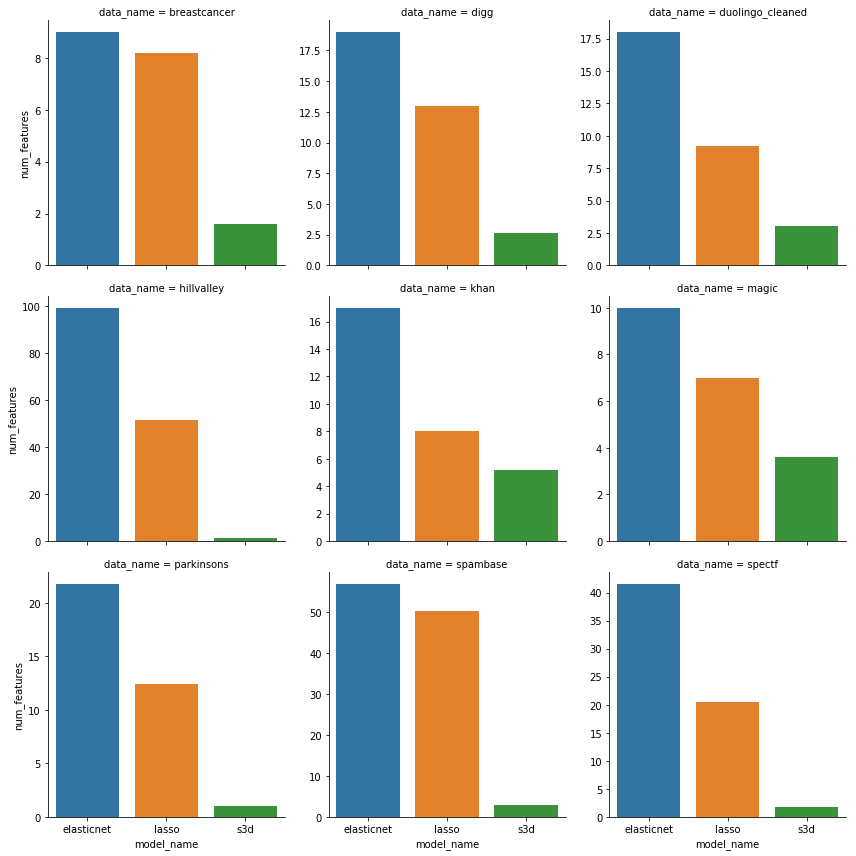

In [59]:
sns.factorplot(x='model_name', y='num_features', data=sparsity_df.query("type_=='classification'"), 
               col_wrap=3, col='data_name', kind='bar', sharey=False)

##### regression

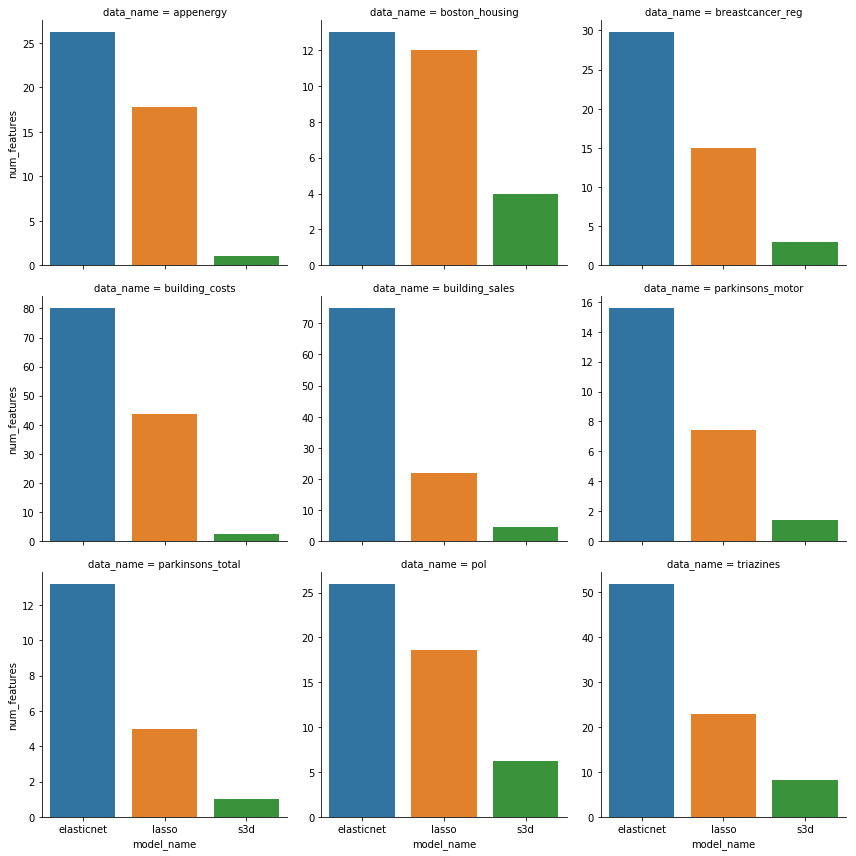

In [60]:
sns.factorplot(x='model_name', y='num_features', data=sparsity_df.query("type_=='regression'"), 
               col_wrap=3, col='data_name', kind='bar', sharey=False)